In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from tqdm import trange
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from pyclustering.cluster.ga import genetic_algorithm, ga_observer, ga_visualizer
from pyclustering.cluster import cluster_visualizer, cluster_visualizer_multidim

In [2]:
df = pd.read_csv("datasets/customer_dataframe.csv", sep="\t", index_col=0)
df_aux = df[['MeanProdOrder', 'MeanSaleOrder', 'MeanPSale']]
scaler = MinMaxScaler()
X = scaler.fit_transform(df_aux.values)

In [3]:
def ga_cluster(sample, nc, cc, pc, mg):
    observer_instance = ga_observer(True, True, True)
    ga_instance = genetic_algorithm(data=sample, count_clusters=nc, chromosome_count=cc, population_count=pc,count_mutation_gens=mg,observer=observer_instance)
    ga_instance.process()
    clusters = ga_instance.get_clusters()
    print([len(c) for c in clusters])    
    clusters_df = {}
    indexes = df.index
    for i in range(len(clusters)):
        clusters_df[i] = df[df.index.isin([indexes[i] for i in clusters[i]])]
    attr = df_aux.columns
    mean_values_to_plot= {a:[] for a in attr}
    to_plot = [[x[1],x[2]] for x in sample]
    for attr_index in range(len(attr)):
        mean_values = []
        for _, cluster_df in clusters_df.items():
            mean_values.append(cluster_df.describe()[attr[attr_index]][1])
        mean_values_to_plot[attr[attr_index]] = mean_values
    ga_visualizer.show_clusters(to_plot, observer_instance)
    
    return mean_values_to_plot, clusters

def calc_silhouette(data, clusters):
    cust_clust = {}
    for i in range(len(clusters)):
        for customer in clusters[i]:
            cust_clust[customer] = i
    clustering = []
    for cust in sorted(cust_clust):
        clustering.append(cust_clust[cust])
    print("Silhouette score: ", silhouette_score(data, clustering))
    return clustering

def plot_stats(means, cl):
    attr = df_aux.columns
    clusters = [i for i in range(len(cl))]
    colors = ["red", "blue", "green", "yellow", "orange", "brown", "purple", "pink"]
    fig, axs = plt.subplots(len(attr),figsize=(15,15))
    for attr_index in range(len(attr)):
        axs[attr_index].bar(clusters, means[attr[attr_index]], color=colors[:len(clusters)])
        axs[attr_index].set_title(f"{attr[attr_index]} - Mean")

def plot_dist(df_aux, clustering):
    fig, axs = plt.subplots(2,2,figsize=(15,15))
    fig.suptitle('Scattering results')
    label_s = 10
    col1, i1 = df_aux['MeanProdOrder'], 0
    col2, i2 = df_aux['MeanPSale'], 2

    axs[0][0].scatter(col1, col2, c=clustering, s=20)
    axs[0][0].tick_params(axis='both', which='major', labelsize=label_s)
    axs[0][0].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[0][0].set_xlabel(df_aux.columns[i1], fontsize=label_s)

    axs[0][1].set_xlim((0,4000))
    axs[0][1].set_ylim((0,100))
    axs[0][1].scatter(col1, col2, c=clustering, s=20)
    axs[0][1].tick_params(axis='both', which='major', labelsize=label_s)
    axs[0][1].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[0][1].set_xlabel(df_aux.columns[i1], fontsize=label_s)

    axs[1][0].set_xlim((0,2000))
    axs[1][0].set_ylim((0,50))
    axs[1][0].scatter(col1, col2, c=clustering, s=20)
    axs[1][0].tick_params(axis='both', which='major', labelsize=label_s)
    axs[1][0].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[1][0].set_xlabel(df_aux.columns[i1], fontsize=label_s)

    axs[1][1].set_xlim((0,1000))
    axs[1][1].set_ylim((0,20))
    axs[1][1].scatter(col1, col2, c=clustering, s=20)
    axs[1][1].tick_params(axis='both', which='major', labelsize=label_s)
    axs[1][1].set_ylabel(df_aux.columns[i2], fontsize=label_s)
    axs[1][1].set_xlabel(df_aux.columns[i1], fontsize=label_s)

[1435, 1509, 1389]


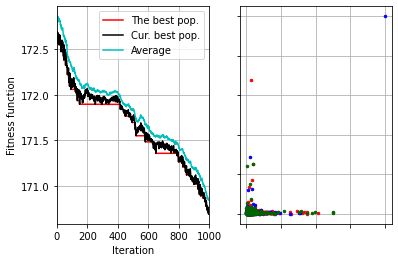

Silhouette score:  -0.055325831765057


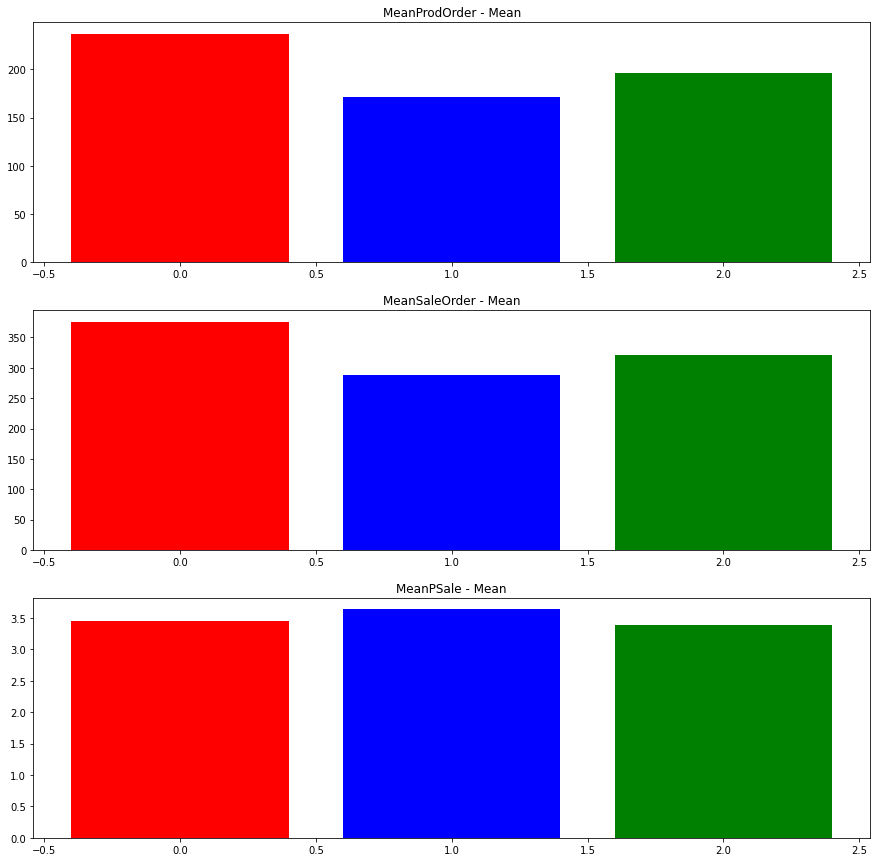

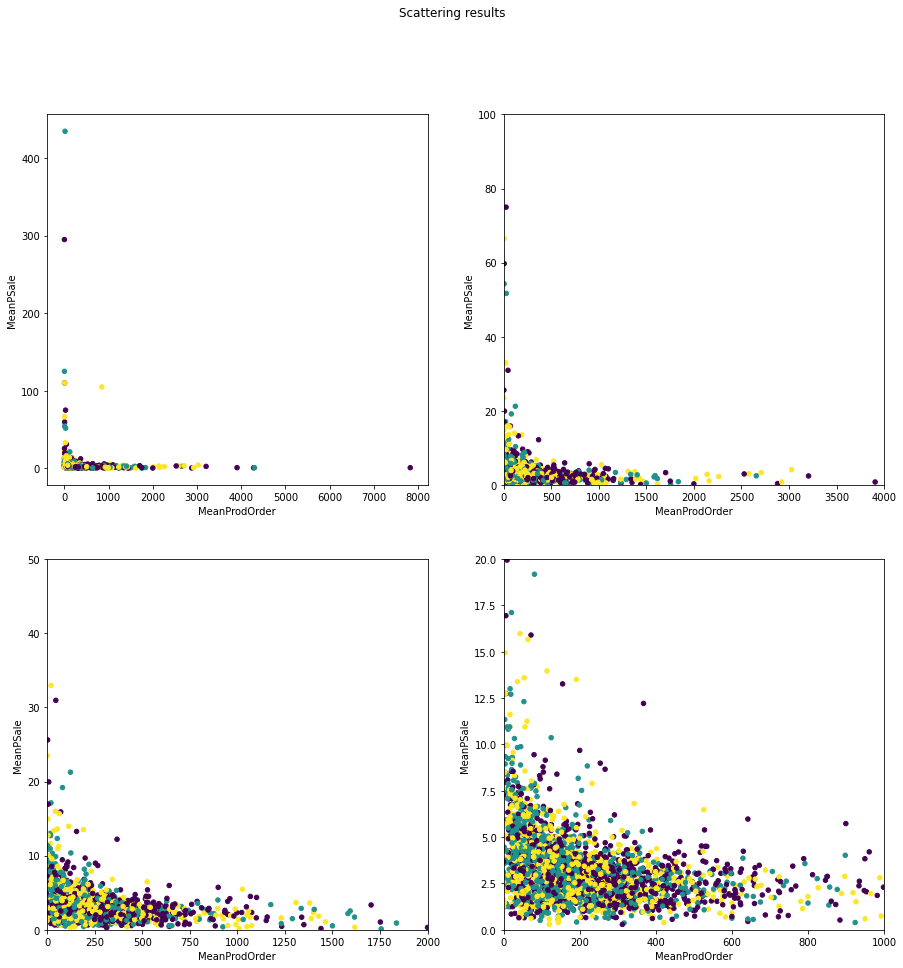

In [4]:
nc = 3
pc = 1000
cc = 50
mg = 5
mv, cl = ga_cluster(X, nc, cc, pc, mg)
clust_ord = calc_silhouette(X, cl)
plot_stats(mv, cl)
plot_dist(df_aux, clust_ord)

[1082, 1085, 1037, 1129]


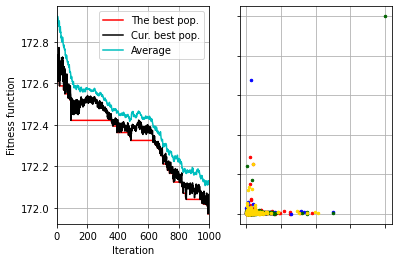

Silhouette score:  -0.0720239887685114


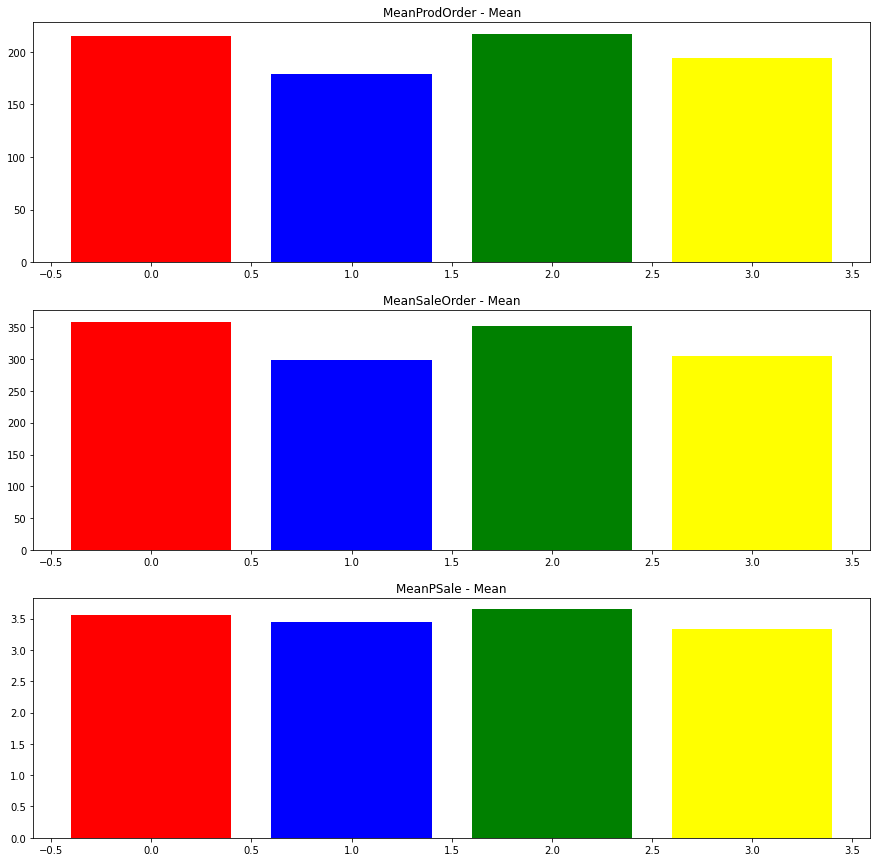

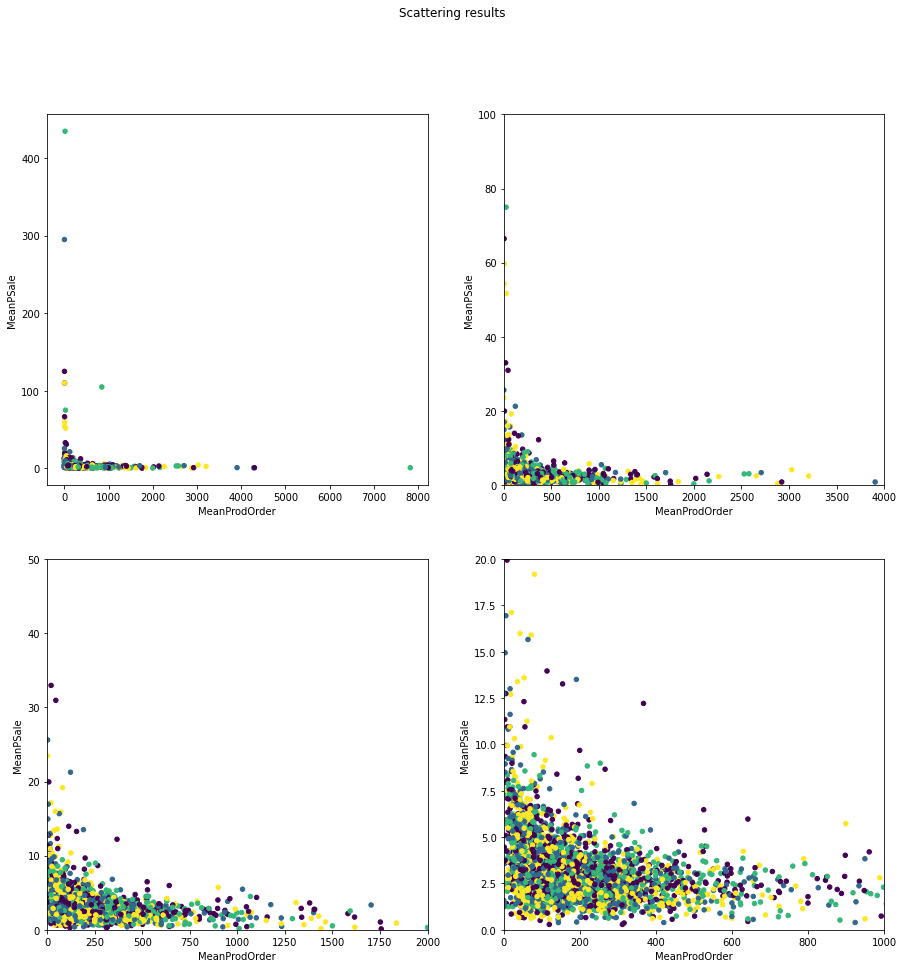

In [5]:
nc = 4
pc = 1000
cc = 50
mg = 5
mv, cl = ga_cluster(X, nc, cc, pc, mg)
clust_ord = calc_silhouette(X, cl)
plot_stats(mv, cl)
plot_dist(df_aux, clust_ord)

[827, 891, 844, 891, 880]


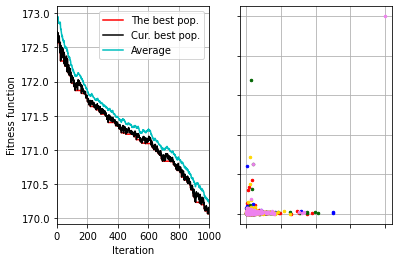

Silhouette score:  -0.11333655622423061


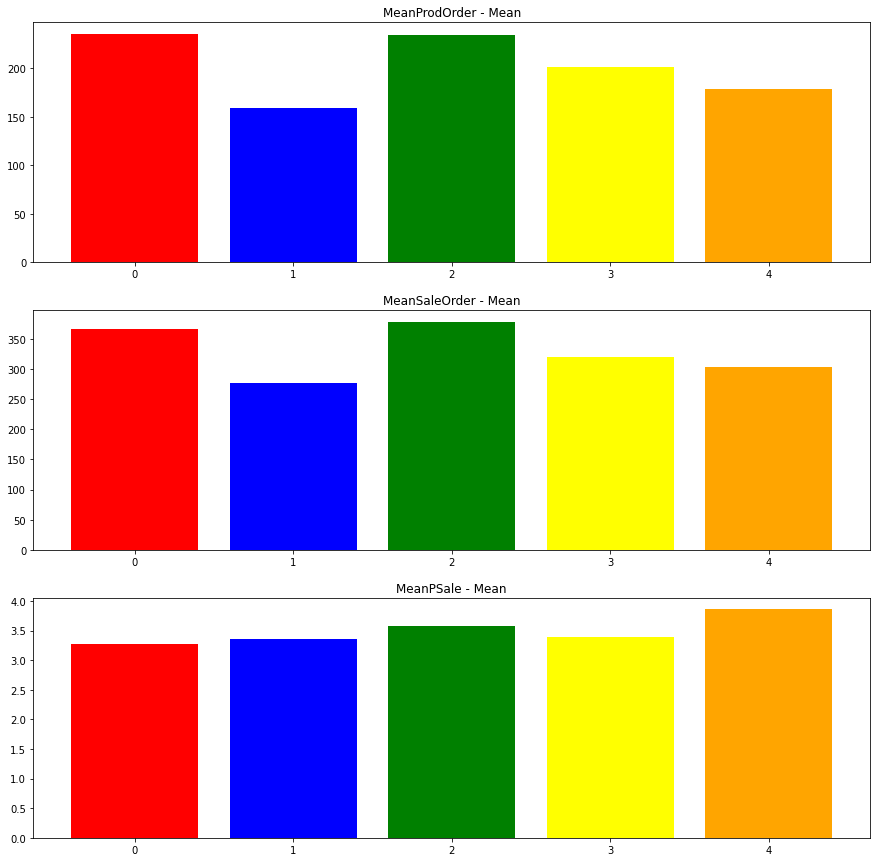

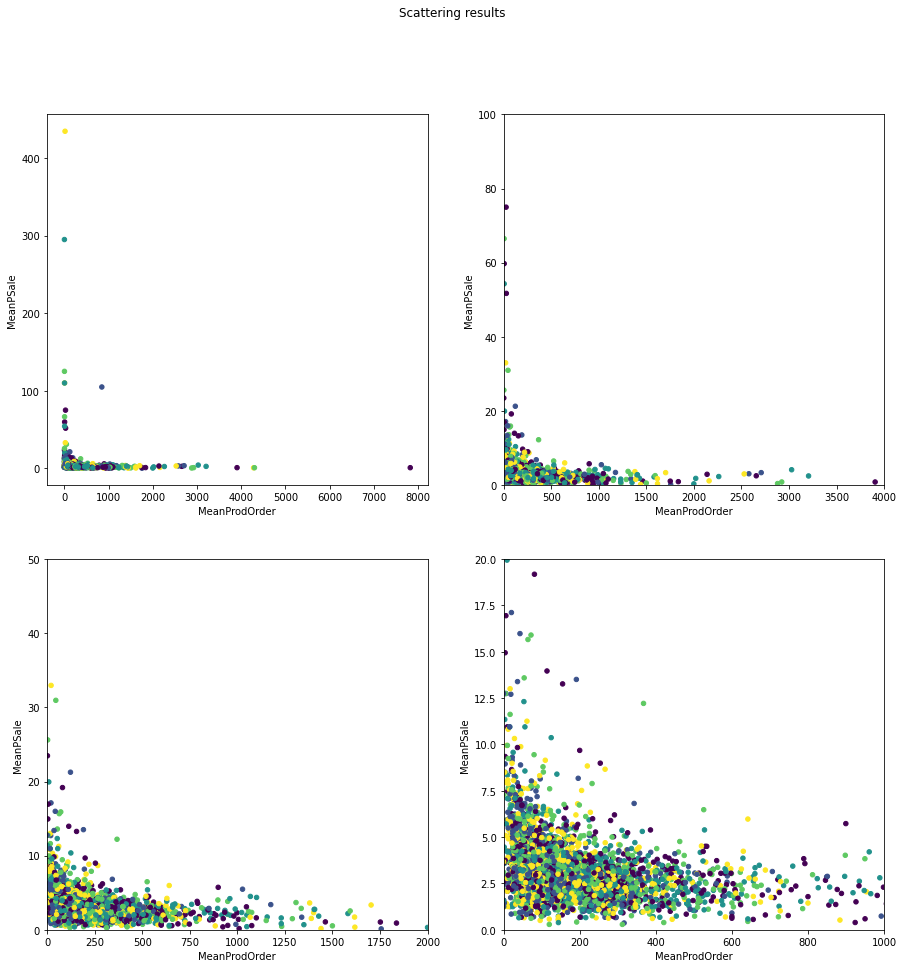

In [6]:
nc = 5
pc = 1000
cc = 50
mg = 5
mv, cl = ga_cluster(X, nc, cc, pc, mg)
clust_ord = calc_silhouette(X, cl)
plot_stats(mv, cl)
plot_dist(df_aux, clust_ord)